<a href="https://colab.research.google.com/github/Prajwal-Pratap-Yadav/Forest-Fire-Detection-using-DL/blob/main/Forest_Fire_Detection_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
# To ensure the GPU is present
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU available")
else:
    print("No GPU available")

GPU available


In [4]:
# Load and Explore the dataset
train_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
val_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"
test_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"

In [5]:
base_dir = '/kaggle/input/the-wildfire-dataset'

for root, dirs, files in os.walk(base_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print('-' * 40)

Root: /kaggle/input/the-wildfire-dataset
Directories: ['the_wildfire_dataset_2n_version']
Files: []
----------------------------------------
Root: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version
Directories: ['val', 'test', 'train']
Files: []
----------------------------------------
Root: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
Directories: ['nofire', 'fire']
Files: []
----------------------------------------
Root: /kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/nofire
Directories: []
Files: ['ashton-morris-cEn0ztKTjes-unsplash.jpg', 'elena-mozhvilo-tvDuKySFy_o-unsplash.jpg', 'kristaps-ungurs-TlJSzJlPRc8-unsplash.jpg', 'nitish-meena-ytGtKR94nAI-unsplash.jpg', 'guillaume-bourdages-VKMx4lonuLg-unsplash.jpg', 'nathan-anderson-0mZLht43A_c-unsplash.jpg', 'chad-madden-9HDfRHhCxME-unsplash.jpg', 'patrick-schneider-I4fDK4Fz_vw-unsplash.jpg', '24498327384_2f23658558_o.jpg', 'sean-foster-ulNJ7tgraTo-unsplash.jpg', 'paul-pas

In [6]:
# Correct path to the training directory
train_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"

# List all the class folders inside the training directory
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the number of classes and their names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


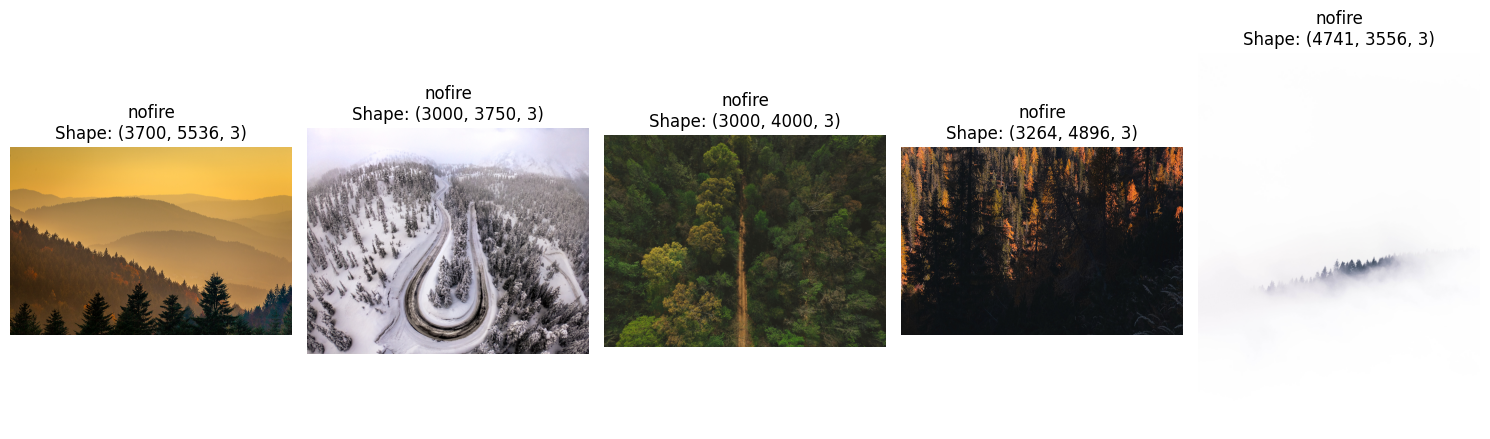

In [7]:
# First class
first_class = classes[0]
class_path = os.path.join(train_dir, first_class)
images = os.listdir(class_path)

# Show first 5 images from the first class
plt.figure(figsize=(15, 5))
for i in range(5):
    img_path = os.path.join(class_path, images[i])
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{first_class}\nShape: {img.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()


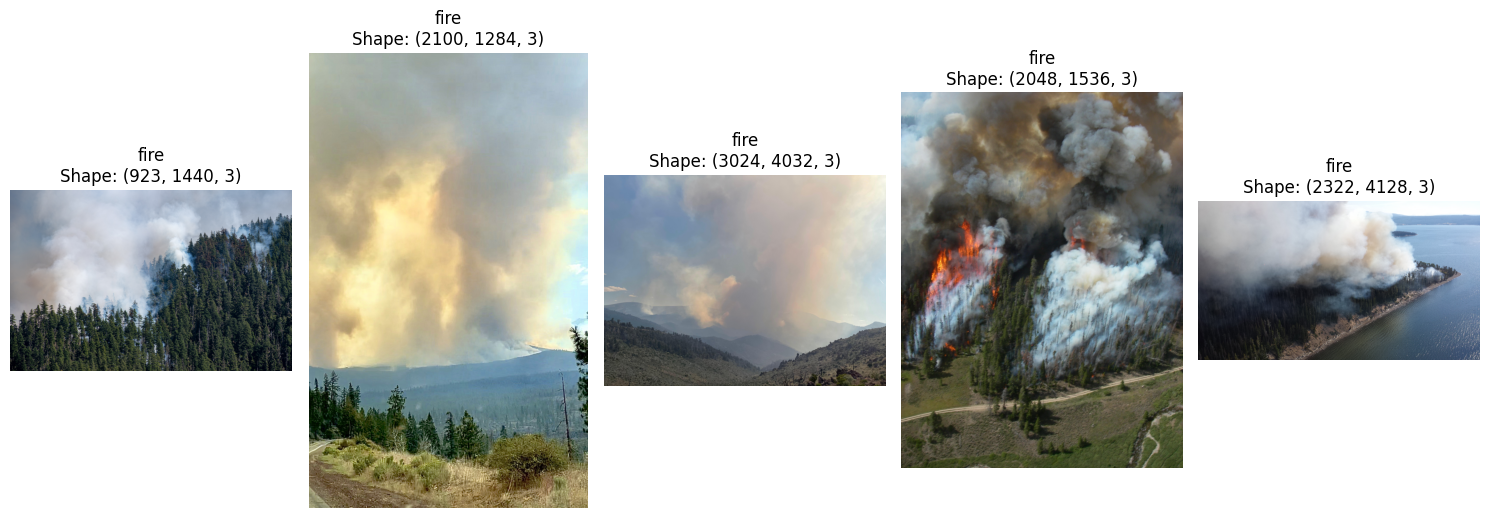

In [8]:
# Second class
first_class = classes[1]
class_path = os.path.join(train_dir, first_class)
images = os.listdir(class_path)

# Show first 5 images from the first class
plt.figure(figsize=(15, 5))
for i in range(5):
    img_path = os.path.join(class_path, images[i])
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{first_class}\nShape: {img.shape}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Preprocessing
img_width, img_height = 150, 150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [12]:
# Map the indices
class_indices = train_generator.class_indices

# print (class_mapping)
# extract the class names
class_names = list(class_indices.keys())

# print the class names
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [14]:
# Let's build the CNN Model
model = Sequential([
    Input (shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])